In [2]:
import os
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

def compute_mae(image1, image2):
    return np.abs(image1 - image2).mean()

In [5]:
gt_folder = "/mnt/disk1/mbbank/tien/BBDM/108/test/B/" 

# for loop over x = 0.0, 0.2, 0.4,..., 1.6

ssim_dict = {}
psnr_dict = {}
mae_dict = {}

for x in np.arange(0.0, 1.8, 0.2):
    str_x = str(x)[:3]
    pre_folder = "results/108_CT2PET_BBDMxSAG_s_" + str_x + "/LBBDM-f4/sample_to_eval/200/"
    ssim_scores = []
    psnr_scores = []
    mae_scores = []
    
    for filename in os.listdir(gt_folder):
    # Make sure the file is a numpy array
        if filename.endswith(".npy"):
            # Construct the paths for the corresponding ground truth and predicted files
            try:
                gt_path = os.path.join(gt_folder, filename)
                pre_path = os.path.join(pre_folder, filename)
            
                # Load the images as numpy arrays
                gt_img = np.load(gt_path, allow_pickle=True)
                pre_img = np.load(pre_path, allow_pickle=True)
            except:
                continue   
            # Preprocess the predicted image
            pre_img = pre_img.mean(axis=-1) / 32767.0
            
            # Normalize the ground truth image
            gt_img = gt_img / 32767.0
            
            # Calculate the SSIM, PSNR, and MAE for this pair
            ssim_score = ssim(pre_img, gt_img, data_range=1)
            psnr_score = psnr(pre_img, gt_img, data_range=1)
            mae = compute_mae(pre_img, gt_img)
            
            # Append the scores to the corresponding lists
            ssim_scores.append(ssim_score)
            psnr_scores.append(psnr_score)
            mae_scores.append(mae * 32767)

    # Calculate the mean scores over all pairs
    mean_ssim = np.mean(ssim_scores)
    mean_psnr = np.mean(psnr_scores)
    mean_mae = np.mean(mae_scores)
    
    ssim_dict[str_x] = mean_ssim
    psnr_dict[str_x] = mean_psnr
    mae_dict[str_x] = mean_mae
    

        

In [6]:
ssim_dict

{'0.0': 0.917537332105011,
 '0.2': 0.9187045061247708,
 '0.4': 0.9191384523535597,
 '0.6': 0.919131150014215,
 '0.8': 0.9186195125438824,
 '1.0': 0.9180120789362487,
 '1.2': 0.9171770940745844,
 '1.4': 0.9163152159650062,
 '1.6': 0.9154832598359242}

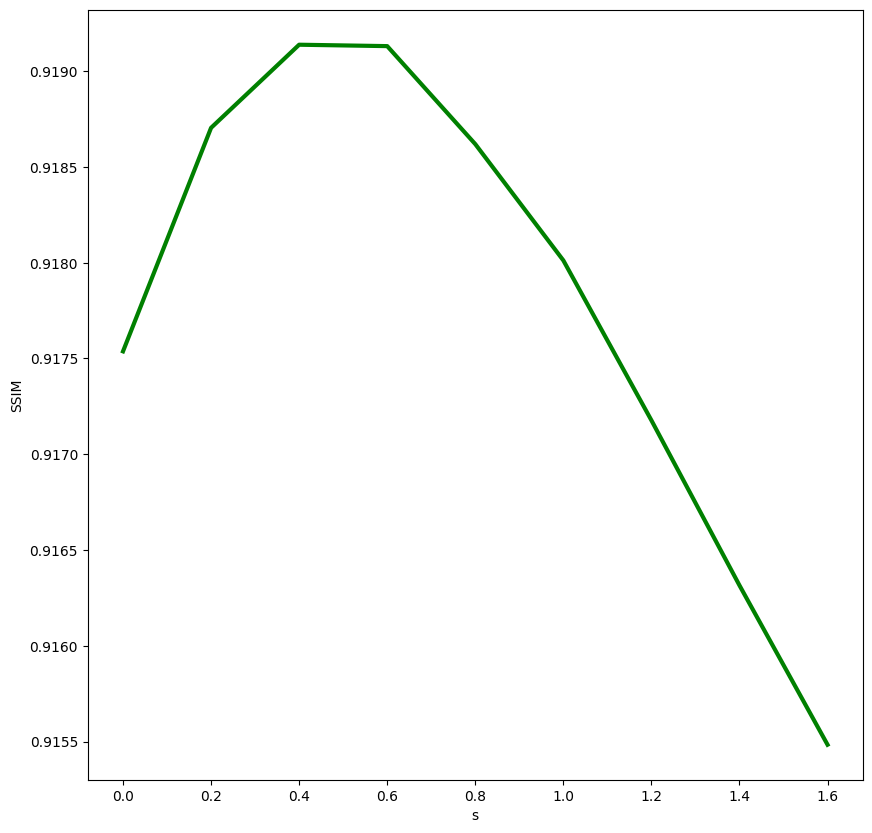

In [13]:
# plot the results using matplotlib
import matplotlib.pyplot as plt 

# x axis values corresponds to the keys in the dictionary 
x = ssim_dict.keys()
# y axis values corresponds to the values in the dictionary
y = ssim_dict.values()

# plotting the points
plt.plot(x, y, color='green', linewidth = 3)
# naming the x axis 
plt.xlabel('s')
# naming the y axis
plt.ylabel('SSIM')
# make the figure bigger 
plt.rcParams["figure.figsize"] = (10,10)
# make a line from (x, y) to (x, 0) 
# plt.vlines(x, ymin=0, ymax=y, colors='b', ls='--', lw=1, label='s')



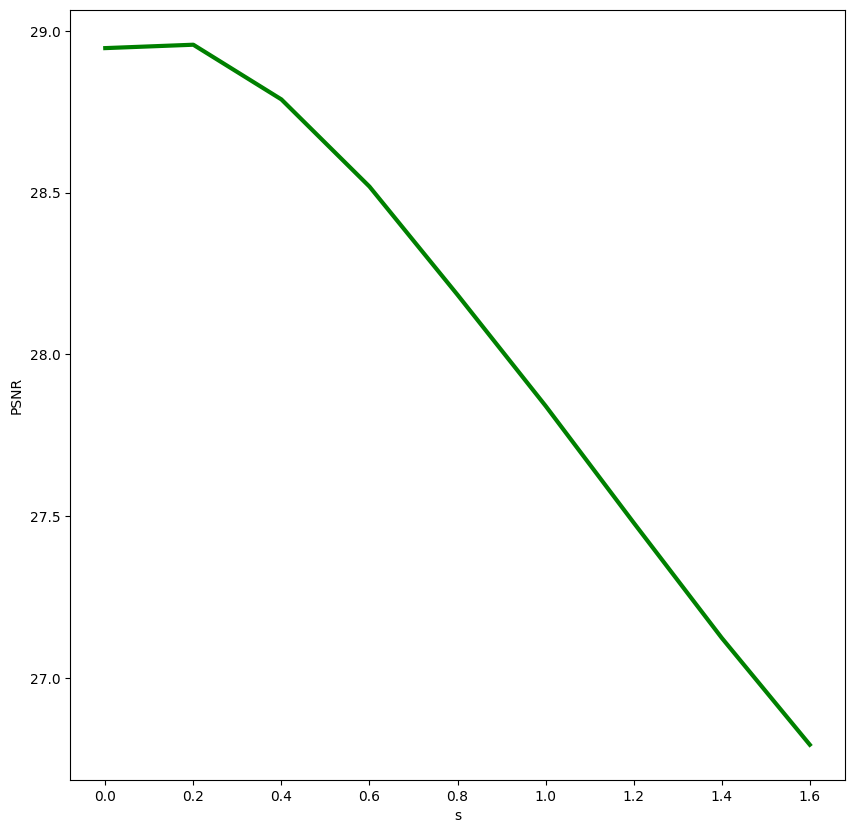

In [14]:
# plot the results using matplotlib
import matplotlib.pyplot as plt 

# x axis values corresponds to the keys in the dictionary 
x = psnr_dict.keys()
# y axis values corresponds to the values in the dictionary
y = psnr_dict.values()

# plotting the points
plt.plot(x, y, color='green', linewidth = 3)
# naming the x axis 
plt.xlabel('s')
# naming the y axis
plt.ylabel('PSNR')
# make the figure bigger 
plt.rcParams["figure.figsize"] = (10,10)
# make a line from (x, y) to (x, 0) 
# plt.vlines(x, ymin=0, ymax=y, colors='b', ls='--', lw=1, label='s')

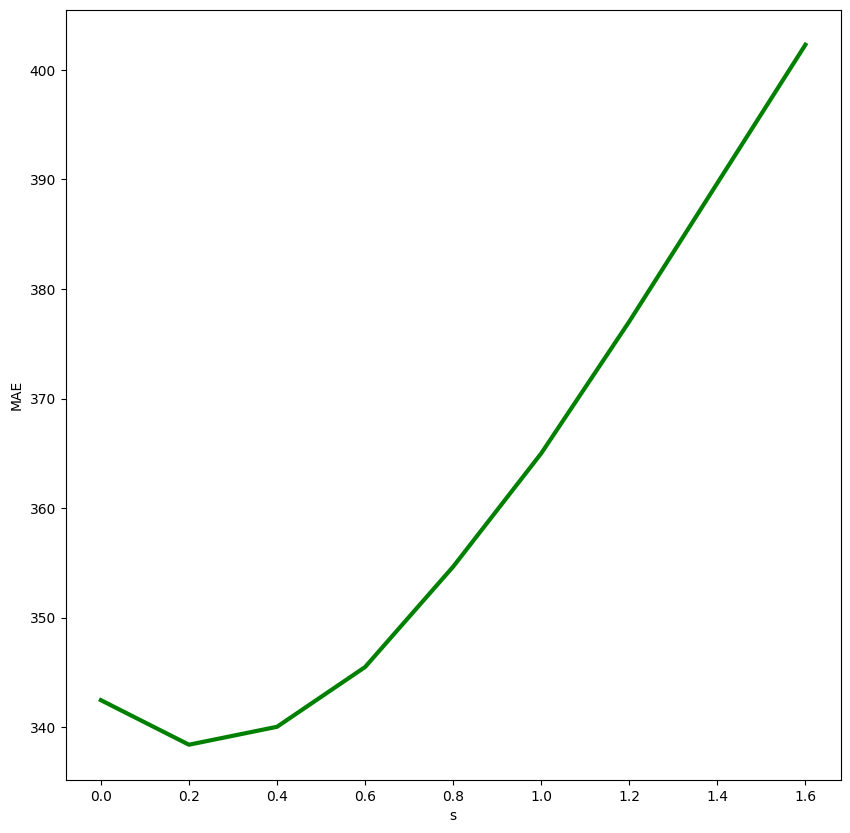

In [15]:
# plot the results using matplotlib
import matplotlib.pyplot as plt 

# x axis values corresponds to the keys in the dictionary 
x = mae_dict.keys()
# y axis values corresponds to the values in the dictionary
y = mae_dict.values()

# plotting the points
plt.plot(x, y, color='green', linewidth = 3)
# naming the x axis 
plt.xlabel('s')
# naming the y axis
plt.ylabel('MAE')
# make the figure bigger 
plt.rcParams["figure.figsize"] = (10,10)
# make a line from (x, y) to (x, 0) 
# plt.vlines(x, ymin=0, ymax=y, colors='b', ls='--', lw=1, label='s')

In [18]:
for file in os.listdir('/mnt/disk1/mbbank/tien/BBDM/108/test/B/'):
    if file.endswith('.npy'):
        print(file)

903.npy
3553.npy
4523.npy
2554.npy
154.npy
1830.npy
2378.npy
3574.npy
2611.npy
4263.npy
3133.npy
4894.npy
3501.npy
3586.npy
738.npy
523.npy
1640.npy
2627.npy
1886.npy
404.npy
675.npy
2593.npy
1757.npy
283.npy
469.npy
2264.npy
3307.npy
2265.npy
4681.npy
1078.npy
2117.npy
2861.npy
4532.npy
4307.npy
2655.npy
2133.npy
1856.npy
1108.npy
3802.npy
3411.npy
4496.npy
1277.npy
2632.npy
448.npy
3048.npy
4907.npy
4983.npy
3832.npy
3916.npy
1756.npy
3294.npy
850.npy
749.npy
3081.npy
3665.npy
3972.npy
4705.npy
3602.npy
431.npy
4557.npy
1926.npy
4076.npy
733.npy
1100.npy
4246.npy
1915.npy
284.npy
3791.npy
381.npy
3508.npy
2035.npy
3343.npy
4426.npy
2197.npy
3463.npy
4355.npy
287.npy
3100.npy
1309.npy
793.npy
4441.npy
2776.npy
1172.npy
751.npy
1408.npy
3771.npy
3535.npy
853.npy
4288.npy
4543.npy
1055.npy
3481.npy
4962.npy
2086.npy
1637.npy
2329.npy
2835.npy
2891.npy
333.npy
3351.npy
2360.npy
1667.npy
4238.npy
2993.npy
1411.npy
1094.npy
230.npy
4064.npy
1847.npy
927.npy
3206.npy
1501.npy
3994.npy
1224.

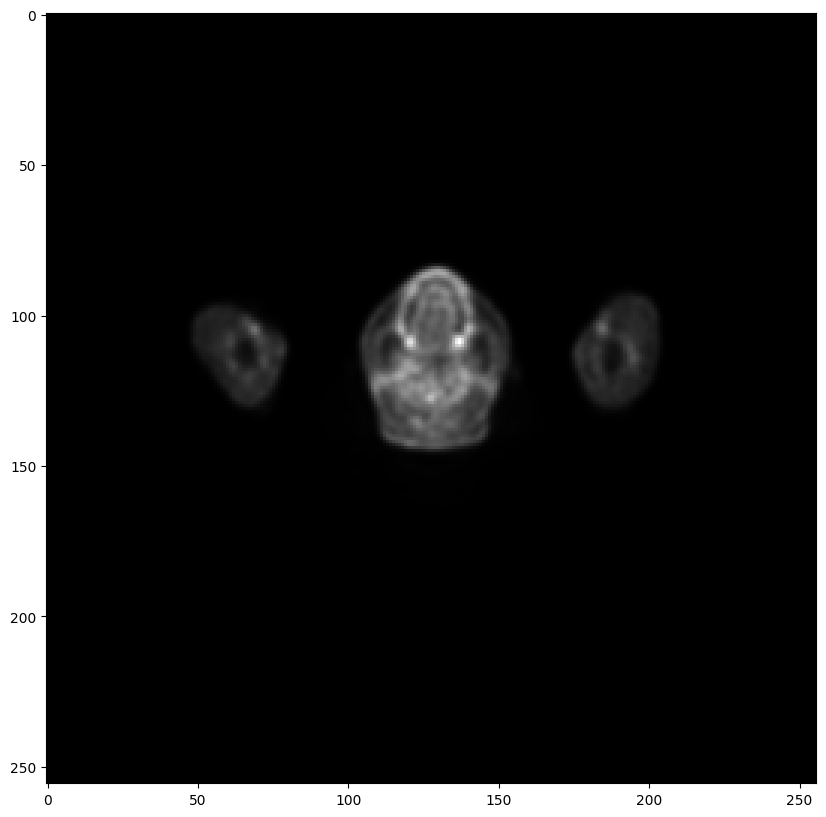

In [21]:
np_image = np.load('/mnt/disk1/mbbank/tien/BBDM/108/test/B/4523.npy', allow_pickle=True) 
plt.imshow(np_image, cmap='gray')

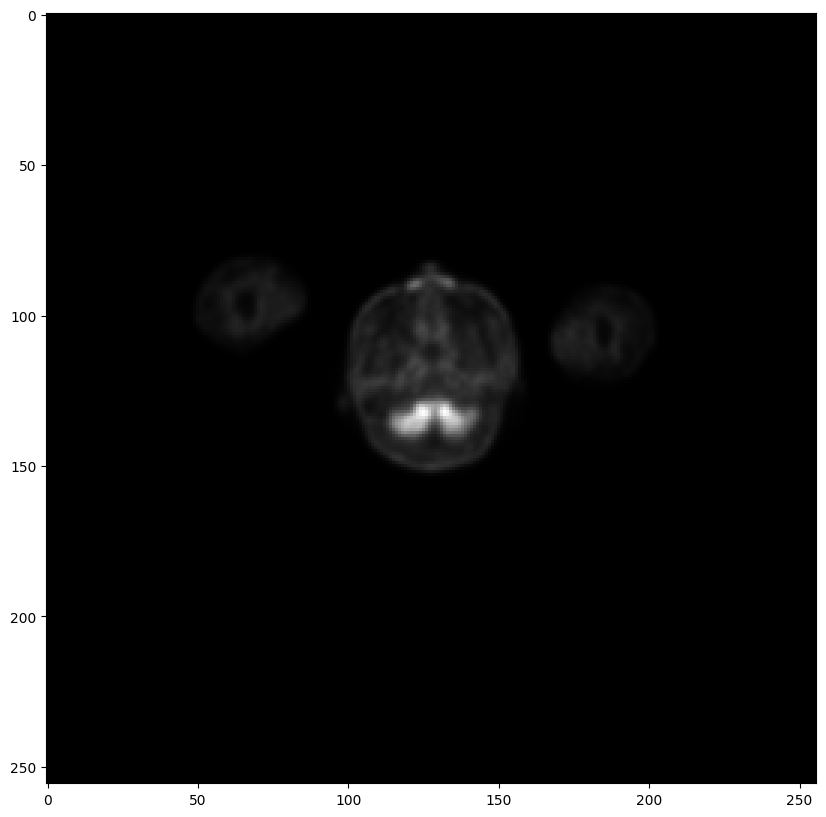

In [26]:
np_image = np.load('/mnt/disk1/mbbank/tien/BBDM/108/test/B/3574.npy', allow_pickle=True) 
plt.imshow(np_image, cmap='gray')

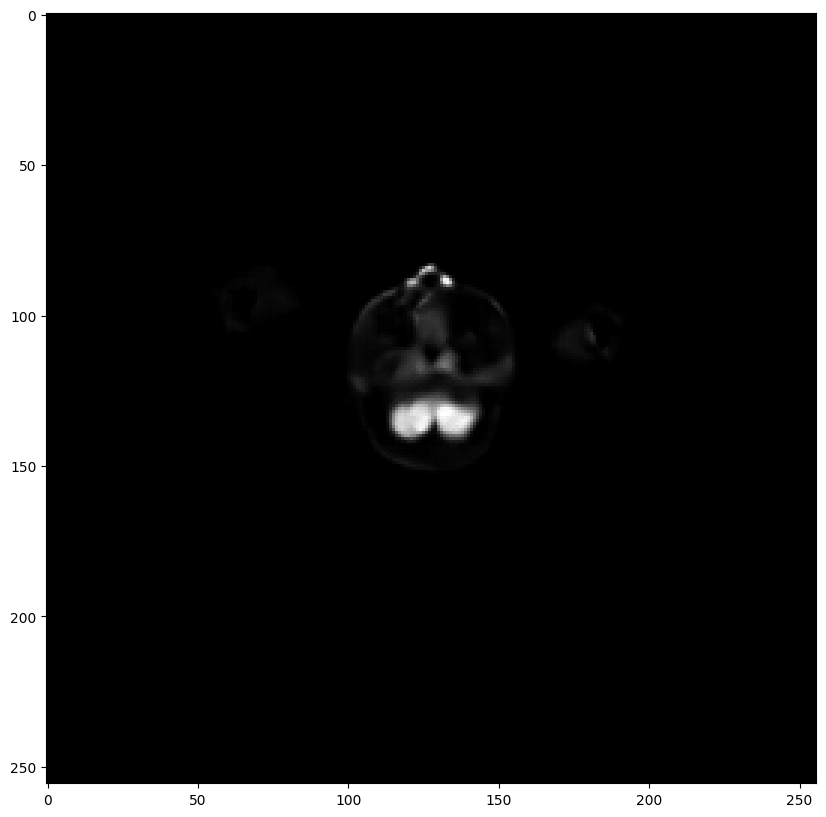

In [28]:
np_image = np.load('results/108_CT2PET_BBDMxSAG_s_0.2/LBBDM-f4/sample_to_eval/200/3574.npy', allow_pickle=True) 
plt.imshow(np_image.mean(axis=-1), cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


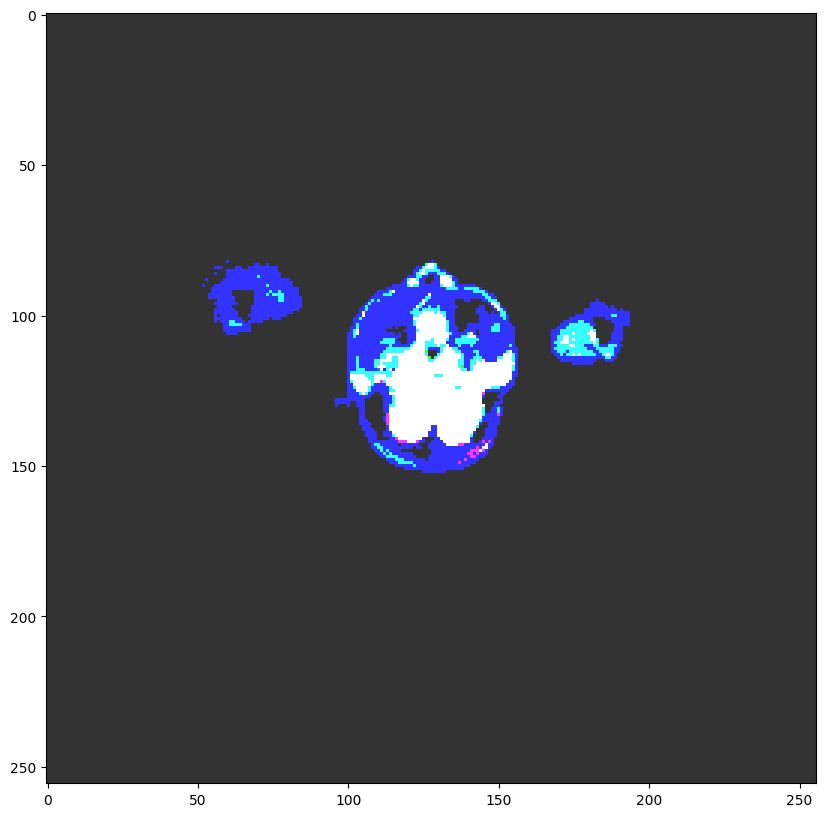

In [34]:
np_image = np.load('results/108_CT2PET_BBDMxSAG_s_0.4/LBBDM-f4/sample_to_eval/200/3574.npy', allow_pickle=True) 
plt.imshow(np_image, cmap='gray')

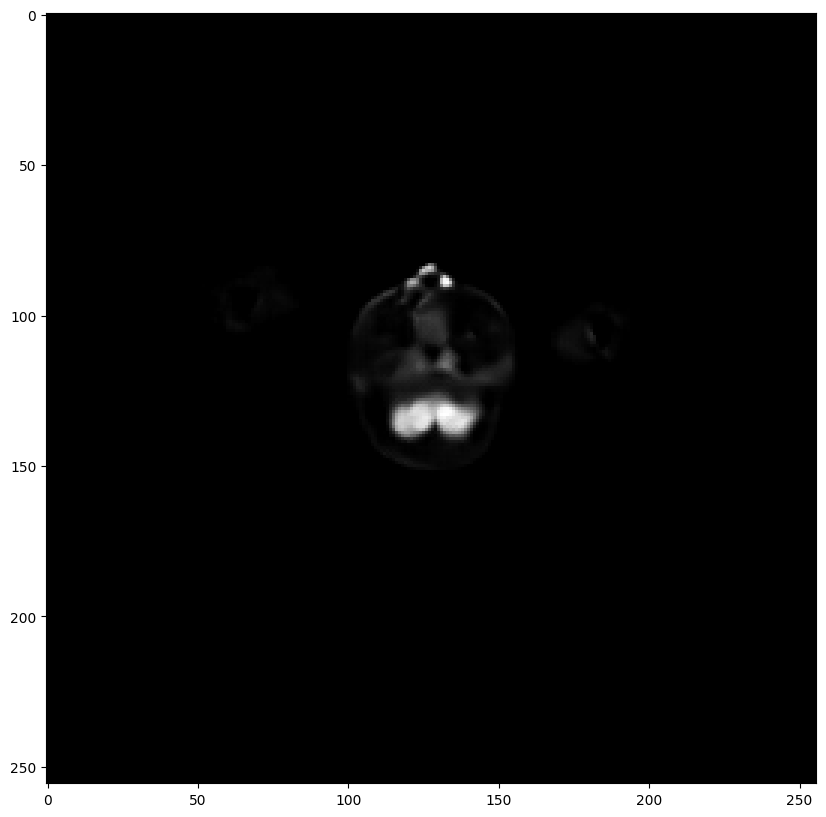

In [32]:
np_image = np.load('results/108_CT2PET_BBDMxSAG_s_0.0/LBBDM-f4/sample_to_eval/200/3574.npy', allow_pickle=True) 
plt.imshow(np_image.mean(axis=-1), cmap='gray')